In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import (
    explained_variance_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

In [3]:
def regression_results(y_true, y_pred, regr_type):

    # Regression metrics
    ev = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print("Evaluation metrics for " + regr_type + "Linear Regression")
    print("Explained Variance: ", round(ev, 4))
    print("r2: ", round(r2, 4))
    print("MAE: ", round(mae, 4))
    print("MSE: ", round(mse, 4))
    print("RMSE: ", round(np.sqrt(mse), 4))
    print()

In [4]:
# Generate simple dataset with one feature
noise = 1
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + noise * np.random.randn(1000, 1)  # Linear relationship with some noise
y_ideal = 4 + 3 * X
# Specify the portion of the dataset to add outliers (e.g., the last 20%)
y_outlier = pd.Series(y.reshape(-1).copy())

# Identify indices where the feature variable X is greater than a certain threshold
threshold = 1.5  # Example threshold to add outliers for larger feature values
outlier_indices = np.where(X.flatten() > threshold)[0]

# Add outliers at random locations within the specified portion
num_outliers = 5  # Number of outliers to add
# randomly choose 5 outliers from outlier_indices
selected_indices = np.random.choice(outlier_indices, num_outliers, replace=False)

# Modify the target values at these indices to create outliers (add significant noise)
y_outlier[selected_indices] += np.random.uniform(50, 100, num_outliers)

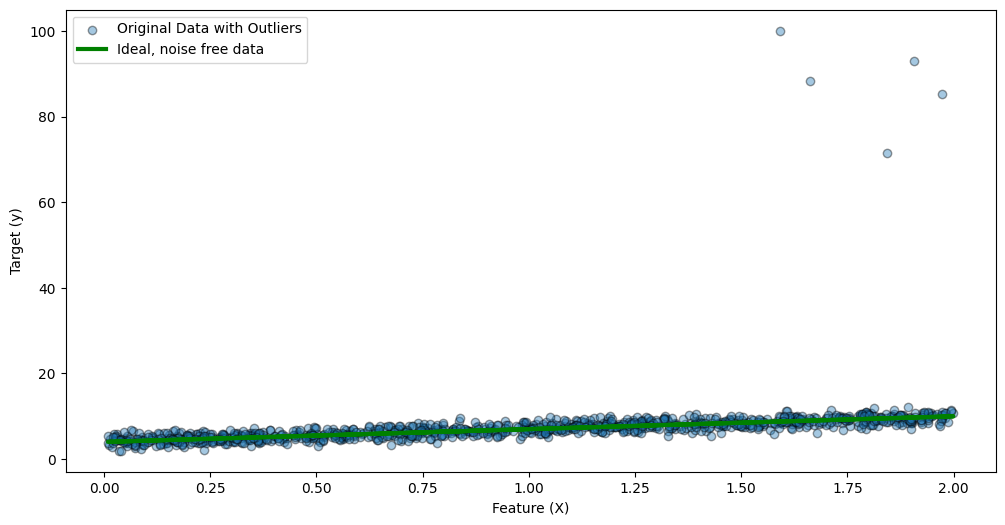

In [5]:
# Plot the data with outliers and the ideal fit line
plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y_outlier, alpha=0.4, ec="k", label="Original Data with Outliers")
plt.plot(X, y_ideal, linewidth=3, color="g", label="Ideal, noise free data")

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("")
plt.legend()
plt.show()

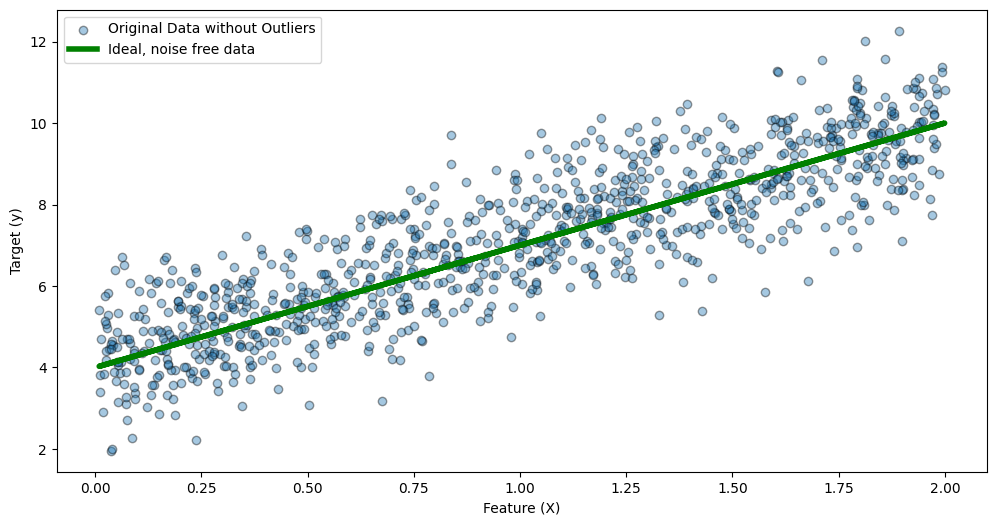

In [ ]:
# Plot the data without the outliers and the ideal fit line
plt.figure(figsize=(12, 6))

plt.scatter(X, y, alpha=0.4, ec="k", label="Original Data without Outliers")
plt.plot(X, y_ideal, linewidth=4, color="g", label="Ideal, noise free data")

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("")
plt.legend()
plt.show()

In [7]:
# Fit Ordinary, Ridge, and Lasso regression models and use them to make predictions on the original, outlier free data

# Fit a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y_outlier)
y_outlier_pred_lin = lin_reg.predict(X)

# Fit a ridge regression model (regularization to control large coefficients)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y_outlier)
y_outlier_pred_ridge = ridge_reg.predict(X)

# Fit a lasso regression model (regularization to control large coefficients)
lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X, y_outlier)
y_outlier_pred_lasso = lasso_reg.predict(X)

In [10]:
# Print the regression result
regression_results(y, y_outlier_pred_lin, "Ordinary")
regression_results(y, y_outlier_pred_ridge, "Ridge")
regression_results(y, y_outlier_pred_lasso, "Lasso")

Evaluation metrics for OrdinaryLinear Regression
Explained Variance:  0.6748
r2:  0.6357
MAE:  0.9468
MSE:  1.4164
RMSE:  1.1901

Evaluation metrics for RidgeLinear Regression
Explained Variance:  0.6766
r2:  0.6375
MAE:  0.9443
MSE:  1.4094
RMSE:  1.1872

Evaluation metrics for LassoLinear Regression
Explained Variance:  0.7394
r2:  0.7003
MAE:  0.8597
MSE:  1.1651
RMSE:  1.0794



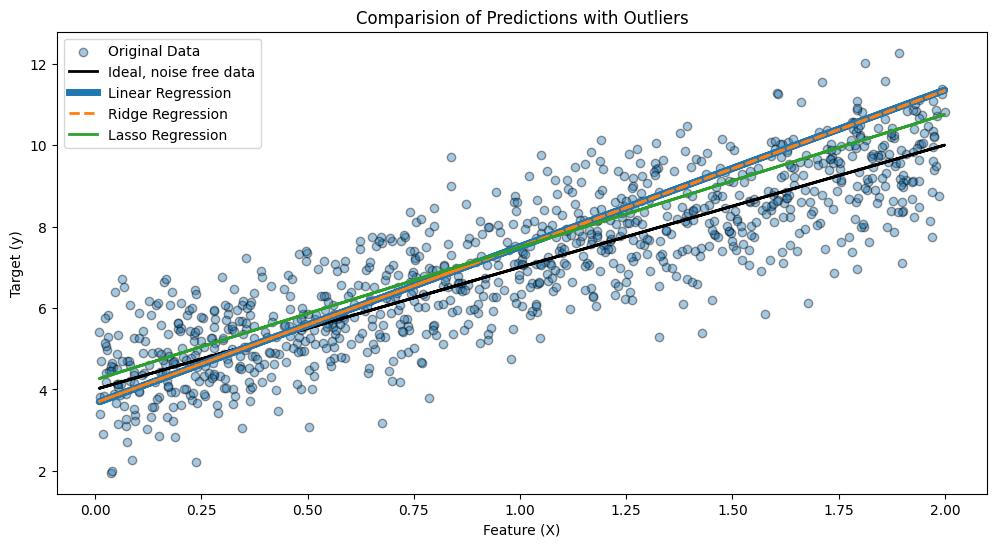

In [11]:
# Plot the data and the predictions for comparison

plt.figure(figsize=(12, 6))

# Scatter Plot of the original data with outliers
plt.scatter(X, y, alpha=0.4, ec="k", label="Original Data")

# Plot the ideal regression line (noise free data)
plt.plot(X, y_ideal, linewidth=2, color="k", label="Ideal, noise free data")

# Plot predictions from the simple linear regression model
plt.plot(X, y_outlier_pred_lin, linewidth=5, label="Linear Regression")

# Plot predictions from the ridge regression model
plt.plot(
    X, y_outlier_pred_ridge, linestyle="--", linewidth="2", label="Ridge Regression"
)

# Plot predictions from the lasso regression model

plt.plot(X, y_outlier_pred_lasso, linewidth=2, label="Lasso Regression")

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Comparision of Predictions with Outliers")
plt.legend()
plt.show()

Evaluation metrics for OrdinaryLinear Regression
Explained Variance:  0.7492
r2:  0.7492
MAE:  0.7873
MSE:  0.975
RMSE:  0.9874

Evaluation metrics for RidgeLinear Regression
Explained Variance:  0.7492
r2:  0.7492
MAE:  0.7874
MSE:  0.975
RMSE:  0.9874

Evaluation metrics for LassoLinear Regression
Explained Variance:  0.7191
r2:  0.7191
MAE:  0.8408
MSE:  1.0923
RMSE:  1.0451



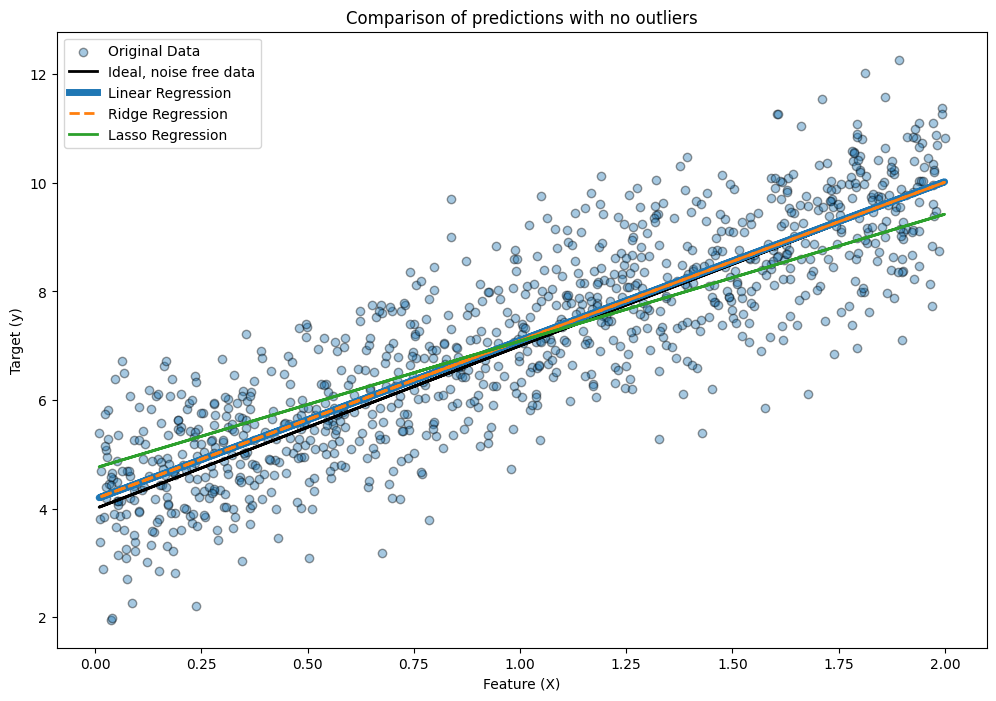

In [14]:
# ordinary linear and ridge resgression performed similarly, while Lasso outperformed both

# Build the models and the prediction plots from the same data, excluding the outliers

# Fit a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# Fit a ridge regression model (regularization to control large coefficients)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y)
y_pred_ridge = ridge_reg.predict(X)

# Fit a lasso regression model (regularization to control large coefficients)
lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X, y)
y_pred_lasso = lasso_reg.predict(X)

# Print the regression result
regression_results(y, y_pred_lin, "Ordinary")
regression_results(y, y_pred_ridge, "Ridge")
regression_results(y, y_pred_lasso, "Lasso")

# Plot the data and the prediction
plt.figure(figsize=(12, 8))

# Scatter plot of the original data
plt.scatter(X, y, alpha=0.4, ec="k", label="Original Data")

# Plot the ideal regression line (noise free data)
plt.plot(X, y_ideal, linewidth=2, color="k", label="Ideal, noise free data")

# Plot predictions from the simple linear regression model
plt.plot(X, y_pred_lin, linewidth=5, label="Linear Regression")

# Plot predictions from the ridge regression model
plt.plot(X, y_pred_ridge, linestyle="--", linewidth=2, label="Ridge Regression")

# Plot predictions from the lasso regression model
plt.plot(X, y_pred_lasso, linewidth=2, label="Lasso Regression")

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')

plt.title('Comparison of predictions with no outliers')
plt.legend()
plt.show()

In [15]:
# Multiple regression regularization and Lasso feature selection

# Create a high dimensional synthetic dataset with a small number of informative features using make_regression

from sklearn.datasets import make_regression

X, y, ideal_coef = make_regression(
    n_samples=100,
    n_features=100,
    n_informative=10,
    noise=10,
    random_state=42,
    coef=True,
)

# Get the ideal predictions based on the informative coefficients used in the regression model
ideal_predictions = X @ ideal_coef

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test, ideal_train, ideal_test = train_test_split(
    X, y, ideal_predictions, test_size=0.3, random_state=42
)